# The Pandas Series

Pandas provides a `Series` object that is very similar to a numpy array, but with some additional functionality. In this lesson, we will learn about pandas Series and how to work with them.

## Overview

A pandas Series object is a one-dimensional, labeled array made up of an autogenerated index that starts at 0 and data of a single data type.

A couple of important things to note about a Series:

- If I try to make a pandas Series using multiple data types like `int` and `string` values, the data will be converted to the same `object` data type; the `int` values will lose their `int` functionality. 


- A pandas Series can be created in several ways; we will look at a few of these ways below. However, **it will most often be created by selecting a single column from a pandas Dataframe in which case the Series retains the same index as the Dataframe.** We will dive into this in the next two lessons: DataFrames and Advanced DataFrames.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

Convention is to import the `pandas` module with the alias `pd`.

## Create a Series

We can use the pandas Series constructor function to create a Series: 

- from a Python list or a NumPy array.

In [3]:
# pd.Series() will attempt to turn whatevers in there into a Series object

In [2]:
numbers_series = pd.Series([100, 43, 26, 17, 17])
type(numbers_series)

pandas.core.series.Series

In [4]:
numbers_series

0    100
1     43
2     26
3     17
4     17
dtype: int64

Notice what happens when we create a Series containing different data types:

In [5]:
pd.Series([4, 5, 4.5])

0    4.0
1    5.0
2    4.5
dtype: float64

In [6]:
pd.Series([1, 2, 3.0, 'word'])

0       1
1       2
2     3.0
3    word
dtype: object

In [7]:
[type(thing) for thing in pd.Series([1, 2, 3.0, 'word'])]

[int, int, float, str]

In [8]:
letters_series = pd.Series(['a', 'e', 'h', 'd', 'b', 'z'])
letters_series

0    a
1    e
2    h
3    d
4    b
5    z
dtype: object

In [9]:
[type(thing) for thing in letters_series]

[str, str, str, str, str, str]

- from a Python dictionary.

In [11]:
labeled_series = pd.Series({'hamsandwich' : 0, 'b' : 1.5, 'c' : 2, 'd': 3.5, 'e': 4, 'f': 5.5})
labeled_series

hamsandwich    0.0
b              1.5
c              2.0
d              3.5
e              4.0
f              5.5
dtype: float64

In [30]:
labeled_series.index

Index(['hamsandwich', 'b', 'c', 'd', 'e', 'f'], dtype='object')

## Vectorized Operations

Like numpy arrays, pandas series are vectorized by default, for example, we can easily use the basic arithmatic operators to manipulate every element in the series.

In [12]:
randomlist = [1,2,3,4,5]

In [15]:
# randomlist + 2
[2 + n  for n in randomlist]

[3, 4, 5, 6, 7]

In [18]:
numbers_series+ 2

0    102
1     45
2     28
3     19
4     19
dtype: int64

In [20]:
numbers_series % 2

0    0
1    1
2    0
3    1
4    1
dtype: int64

Comparison operators also work:

In [23]:
numbers_series

0    100
1     43
2     26
3     17
4     17
dtype: int64

In [24]:
numbers_series == 17

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [22]:
numbers_series > 2

0    True
1    True
2    True
3    True
4    True
dtype: bool

## Series Attributes

**Attributes** return useful information about a Series' properties; they don't perform operations or calculations with the Series. Attributes are easily accessible using dot notation like we will see in the examples below. *Jupyter Notebook allows you to quickly access a list of available attributes by pressing the tab key after the series name followed by a period or dot; this is called dot notation or attribute access.*

There are several components that make up a pandas Series, and I can easliy access each component by using attributes.

### `.index`

- **The index** allows us to reference items in the series. In our numbers_series, the index consists of the numbers 0-3.

In [26]:
numbers_series

0    100
1     43
2     26
3     17
4     17
dtype: int64

In [25]:
# Access the index of the Series using dot notation.

numbers_series.index

RangeIndex(start=0, stop=5, step=1)

### `.values`

- **The values** are my data.

In [29]:
# The values are stored in a NumPy array. Hello vectorized operations!

type(numbers_series.values)

numpy.ndarray

### `.dtype`

- **The dtype** is the data type of the elements in the Series. In our numbers_series,  the data type is `int64`; it was inferred from the data we used.

    Pandas has several main data types we will work with:

    - int: integer, whole number values
    - float: decimal numbers
    - bool: true or false values
    - object: strings
    - category: a fixed and limited set of string values

In [32]:
numbers_series.dtype

dtype('int64')

### `.name`

- **The name** is an optional human-friendly name for the Series.

Our Series doesn't have a name, but we can give it one:

In [34]:
numbers_series

0    100
1     43
2     26
3     17
4     17
dtype: int64

In [35]:
numbers_series.name = 'numbers_series'

In [41]:
# will *NOT* work
# 'numbers_series' = numbers_series.name

SyntaxError: cannot assign to literal (<ipython-input-41-cbacb4a1eea2>, line 1)

In [37]:
numbers_series

0    100
1     43
2     26
3     17
4     17
Name: numbers_series, dtype: int64

### `.size`

- The `.size` attribute returns an int representing the number of rows in the Series. *NULL values are included.*

In [40]:
len(numbers_series)

5

In [38]:
numbers_series.size

5

### `.shape`

- The `.shape` attribute returns a tuple representing the rows and columns when used on a two-dimensional structure like a DataFrame, but it can also be used on a Series to return its number of rows. *NULL values are included.*

In [39]:
numbers_series.shape

(5,)

## Series Methods

**Methods** used on pandas Series objects often return new Series objects; most also offer parameters with default settings designed to keep the user from mutating the original Series objects. (`inplace=False`)

- If I want to save any manipulations or transformations I make on my Series, I can either assign the Series to a variable or adjust my parameters. 

Series have a number of useful methods that we can use for various sorts of manipulations and transformations; let's look at a few.

### `.head`, `.tail`, `.sample`

- The `.head(n)` method returns the first n rows in the Series; `n = 5` by default. This method returns a new Series with the same indexing as the original Series. 


- The `.tail(n)` method returns the last n rows in the Series; `n = 5` by default. Increase or decrease your value for n to return more or less than 5 rows.


- The `.sample(n)` method returns a random sample of rows in the Series; `n = 1` by default. Again, the index is retained.

In [44]:
numbers_series.head(3)

0    100
1     43
2     26
Name: numbers_series, dtype: int64

In [46]:
numbers_series.tail(2)

3    17
4    17
Name: numbers_series, dtype: int64

In [54]:
numbers_series.sample(2)

2    26
4    17
Name: numbers_series, dtype: int64

### `.astype`

We can convert the data types of the values in our Series with the `.astype` method.

In [49]:
num_strings = pd.Series([3, 4, 5, 6]).astype('str')
num_strings

0    3
1    4
2    5
3    6
dtype: object

In [55]:
floats = pd.Series([3, 4, 5, 6]).astype('float')
floats

0    3.0
1    4.0
2    5.0
3    6.0
dtype: float64

In [56]:
floats.astype('int')

0    3
1    4
2    5
3    6
dtype: int64

### `.value_counts`

The `.value_counts()` method returns a new Series consisting of a labeled index representing the unique values from the original Series and values representing the frequency each unique value appears in the original Series. *It's like performing a SQL `GROUP BY` with a `COUNT`.*


- This is an extremely useful method you will find yourself using often with Series containing object and category data types. 

In [59]:
pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).value_counts()

pandas.core.series.Series

### `.describe`

The `.describe` method returns a Series of descriptive statistics on a pandas Series. The information it returns depends on the data type of the elements in the Series.

In [61]:
numdescribe = numbers_series.describe()

In [62]:
numbers_series

0    100
1     43
2     26
3     17
4     17
Name: numbers_series, dtype: int64

**More Descriptive Statistics Methods**

Pandas has a number of methods that can be used to view summary statistics
about our data. The table below ([taken from
here](https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics))
provides a summary of some of the most commonly used methods.

| Function   | Description                                |
|----------  |-------------                               |
| `count`    | Number of non-NA observations              |
| `sum`      | Sum of values                              |
| `mean`     | Mean of values                             |
| `median`   | Arithmetic median of values                |
| `min`      | Minimum                                    |
| `max`      | Maximum                                    |
| `mode`     | Mode                                       |
| `abs`      | Absolute Value                             |
| `std`      | Bessel-corrected sample standard deviation |
| `quantile` | Sample quantile (value at %)               |

In [65]:
{
    'count': numbers_series.count(),
    'sum': numbers_series.sum(),
    'mean': numbers_series.mean()
}

{'count': 5, 'sum': 203, 'mean': 40.6}

### `.nlargest`, `.nsmallest`

These methods allow me to return the n largest or n smallest values from a pandas Series. *I can set the `keep` parameter to `first`, `last`, or `all` to deal with duplicate largest or smallest values; this is quite handy.*

The default argument for keep is shown below.

```python
Series.nlargest(n=5, keep='first')
Series.nsmallest(n=5, keep='first')
```

In [67]:
numbers_series

0    100
1     43
2     26
3     17
4     17
Name: numbers_series, dtype: int64

In [66]:
numbers_series.nlargest(n=1)

0    100
Name: numbers_series, dtype: int64

In [71]:
# If I want to return all of the lowest values, not just the first instance.

numbers_series.nsmallest(n=2, keep='all')

3    17
4    17
Name: numbers_series, dtype: int64

### `.sort_values`, `.sort_index`

These are handy methods that allow you to either sort your Series values or index respectively in ascending or descending order.

- I can use the parameters for these methods to customize my sorts to meet my needs.

In [72]:
letters_series.sort_values()

0    a
4    b
3    d
1    e
2    h
5    z
dtype: object

In [74]:
# The Series values retain their index from the original Series.

letters_series.sort_values(ascending=False)

5    z
2    h
1    e
3    d
4    b
0    a
dtype: object

In [75]:
# I can reset the index using this parameter if that meets my needs.

letters_series.sort_values(ignore_index=True)

0    a
1    b
2    d
3    e
4    h
5    z
dtype: object

In [76]:
# I can also sort by index values.

labeled_series.sort_index(ascending=False)

hamsandwich    0.0
f              5.5
e              4.0
d              3.5
c              2.0
b              1.5
dtype: float64

## Exercises Part I

Make a file named `pandas_series.py` or `pandas_series.ipynb` for the following exercises.

Use pandas to create a Series named fruits from the following list:

        ["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]
        
Use Series attributes and methods to explore your fruits Series.

In [7]:
fruits = ["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]

In [8]:
fruits = pd.Series(fruits)


In [5]:
type(fruits)

pandas.core.series.Series

1. Determine the number of elements in fruits.
    

In [6]:
fruits.size

17

2. Output only the index from fruits.
    

In [7]:
fruits.index

RangeIndex(start=0, stop=17, step=1)

3. Output only the values from fruits.
    

In [8]:
fruits.values

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew', 'kiwi',
       'kiwi', 'kiwi', 'mango', 'blueberry', 'blackberry', 'gooseberry',
       'papaya'], dtype=object)

4. Confirm the data type of the values in fruits.
    

In [9]:
fruits.dtype

dtype('O')

5. Output only the first five values from fruits. Output the last three values. Output two random values from fruits.
    

In [10]:
fruits.head()

0          kiwi
1         mango
2    strawberry
3     pineapple
4    gala apple
dtype: object

In [11]:
fruits.tail(3)

14    blackberry
15    gooseberry
16        papaya
dtype: object

In [12]:
fruits.sample(2)

10      kiwi
16    papaya
dtype: object

6. Run the `.describe()` on fruits to see what information it returns when called on a  Series with string values.

In [13]:
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

7. Run the code necessary to produce only the unique string values from fruits.

In [18]:
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

8. Determine how many times each unique string value occurs in fruits.

In [17]:
fruits.value_counts()

kiwi                4
mango               2
strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

9. Determine the string value that occurs most frequently in fruits.

In [30]:
fruits.mode()

0    kiwi
dtype: object

10. Determine the string value that occurs least frequently in fruits.

In [33]:
fruits_counts = pd.Series(fruits.value_counts())
fruits_counts.nsmallest(n=1, keep='all')


strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

## Indexing and Subsetting

- This is where the pandas index shines; we can select subsets of our data using index labels, index position, or boolean sequences (list, array, Series).


- I can also pass a sequence of boolean values to the indexing operator, `[]`; that sequence could be a list or array, but it can also be another pandas Series **if the index of the boolean Series matches the original Series**.

In [77]:
numbers_series

0    100
1     43
2     26
3     17
4     17
Name: numbers_series, dtype: int64

In [79]:
numbers_series > 40

0     True
1     True
2    False
3    False
4    False
Name: numbers_series, dtype: bool

In [78]:
# I can see that my condition is being met by the values at index 0 and index 1.

bools = numbers_series > 40
bools

0     True
1     True
2    False
3    False
4    False
Name: numbers_series, dtype: bool

In [81]:
# I pass my boolean mask to the original Series to return the values that meet the condition.
# 
# numbers series where the things in numbers series are above 40
# [ ~ "where"
numbers_series[bools]
numbers_series[numbers_series > 40]

0    100
1     43
Name: numbers_series, dtype: int64

In [82]:
# I can simply pass my conditional expression into the indexing operator, too.

numbers_series[numbers_series > 40]

0    100
1     43
Name: numbers_series, dtype: int64

## More Series Attributes

### `.str`

In addition to vectorized arithmetic operations, pandas also provides us with a way to vectorize string manipulation. Once we access the `.str` attribute, we can apply a string method to each string value in a Series. *Performing string manipulation like this does not mutate my original Series; I have to assign my manipulation to a variable if I want to keep it.*

For example, we can call the `.lower` method, which will convert each string value in the string_series to lowercase.

In [83]:
string_series = pd.Series(['Hello', 'CodeuP', 'StUDenTs'])
string_series

0       Hello
1      CodeuP
2    StUDenTs
dtype: object

In [88]:
numbers_series.astype(str).str.replace('43', '42').astype(int)

0    100
1     42
2     26
3     17
4     17
Name: numbers_series, dtype: int64

In [84]:
string_series.str.lower()

0       hello
1      codeup
2    students
dtype: object

In [89]:
string_series.str.replace('e', '_')

0       H_llo
1      Cod_uP
2    StUD_nTs
dtype: object

In [ ]:
string_series

In [90]:
# Since each method returns a Series, I can use method chaining like this.

string_series.str.lower().str.replace('e', '_')

0       h_llo
1      cod_up
2    stud_nts
dtype: object

In [91]:
string_series.str.lower().str.startswith('h')

0     True
1    False
2    False
dtype: bool

In [92]:
# I can even use method chaining and indexing!

string_series[string_series.str.lower().str.startswith('h')]

0    Hello
dtype: object

In [93]:
# Notice my original string_series is not mutated. 

string_series

0       Hello
1      CodeuP
2    StUDenTs
dtype: object

## More Series Methods

### `.any`, `.all`

We can use the `.any` method to check if any value in the series is `True`, and `.all`, to check if every value in a Series is `True`. Both methods return a boolean value denoting whether the condition is met.

For example, we could check to see if there are any negative values in a Series like this:

In [97]:
numbers_series

0    100
1     43
2     26
3     17
4     17
Name: numbers_series, dtype: int64

In [94]:
numbers_series < 0

0    False
1    False
2    False
3    False
4    False
Name: numbers_series, dtype: bool

In [103]:
(numbers_series == 17).any()

True

In [99]:
(numbers_series == 17).all()

False

We could check if all the numbers are positive like this:

In [104]:
(numbers_series > 0).any()

True

In [105]:
(numbers_series > 0).all()

True

In [ ]:
series1.isna().any()

### `.isin`

The `.isin` method can be used to tell whether each element in a Series matches an element in a passed sequence of values. For example, if we have a Series of letters, we could use `.isin` to tell whether each letter is a vowel.

In [106]:
# Create a list of vowels.

vowels = list('aeiou')
vowels

['a', 'e', 'i', 'o', 'u']

In [107]:
# Create a list of letters.

letters = list('abcdefghijk')
letters

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

In [108]:
# Construct a pandas Series from my list of letters.

letters_series = pd.Series(letters)
letters_series

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
dtype: object

In [110]:
vowels

['a', 'e', 'i', 'o', 'u']

In [109]:
# Use .isin to check if each element in letters_series matches an element in my list of vowels.

letters_series.isin(vowels)

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10    False
dtype: bool

In [112]:
# Use my Series of boolean values to return the values that meet my condition.

letters_series[letters_series.isin(vowels)]

0    a
4    e
8    i
dtype: object

### `.apply` 

Sometimes there are more complicated operations that we want to perform, and we need to apply a function to each element in a Series. In this case, we can define a function that handles a single value and use the `.apply` method to apply the function to each element in a Series.

In [113]:
def even_or_odd(n):
    '''
    A function that takes a number and returns a string indicating whether the passed number is even or odd.
    
    >>> even_or_odd(3)
    'odd'
    >>> even_or_odd(2)
    'even'
    '''
    if n % 2 == 0:
        return 'even'
    else:
        return 'odd'

numbers_series.apply(even_or_odd)

0    even
1     odd
2    even
3     odd
4     odd
Name: numbers_series, dtype: object

Here we define a function, `even_or_odd`, then reference that function when we call `.apply`. Notice that when we reference the `even_or_odd` function, we are **not** calling the function, rather, we are passing the `even_or_odd` function itself to the `.apply` method as an argument, which pandas will then call on every element of the Series.

It is also very common to see lambda functions used along with `.apply`. We could re-write the above example with a lambda function like so:

In [115]:
numbers_series

0    100
1     43
2     26
3     17
4     17
Name: numbers_series, dtype: int64

In [114]:
numbers_series.apply(lambda n: 'even' if n % 2 == 0 else 'odd')

0    even
1     odd
2    even
3     odd
4     odd
Name: numbers_series, dtype: object

## Exercises Part II

 Explore more attributes and methods while you continue to work with the fruits Series.

1. Capitalize all the string values in fruits.

In [34]:
fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

2. Count the letter "a" in all the string values (use string vectorization).

In [36]:
fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

3. Output the number of vowels in each and every string value.
    

In [9]:
fruits.str.count('[aeiou]')


0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

4. Write the code to get the longest string value from fruits.

In [11]:
fruits_string_len = fruits.str.len()
pd.Series(fruits_string_len)
fruits_string_len.nlargest(n=1,keep='all')


5    16
dtype: int64

In [19]:
fruits[fruits_string_len == fruits_string_len.max()]

5    honeycrisp apple
dtype: object

5. Write the code to get the string values with 5 or more letters in the name.

In [89]:
fruits[fruits_string_len >= 5]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

6. Use the `.apply` method with a lambda function to find the fruit(s) containing the letter `"o"` two or more times.

In [109]:
fruits[fruits.apply(lambda x: x.count('o') >=2)]

6         tomato
15    gooseberry
dtype: object

In [98]:
fruits[fruits.str.count('o') >= 2]

6         tomato
15    gooseberry
dtype: object

7. Write the code to get only the string values containing the substring "berry".

In [111]:
fruits[fruits.str.contains('berry')]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

8. Write the code to get only the string values containing the substring "apple".

In [112]:
fruits[fruits.str.contains('apple')]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

9. Which string value contains the most vowels?

In [116]:
fruits[max(fruits.str.count('[aeiou]'))]

'honeycrisp apple'

___

## Binning Data

I can bin continuous data to convert it to categorical data. We will look at two different ways to accomplish binning below.

In [116]:
s = pd.Series(list(range(15)))
s

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
dtype: int64

### `pd.cut(s, bins=n)`

We can either specify the number of bins to create, and pandas will create bins of equal size, or we can specify the bin edges ourselves by passing a list of bin edges or cutoffs.

In [121]:
# Bin values into 3 equal-sized bins.

pd.cut(s, 7)

0     (-0.014, 2.0]
1     (-0.014, 2.0]
2     (-0.014, 2.0]
3        (2.0, 4.0]
4        (2.0, 4.0]
5        (4.0, 6.0]
6        (4.0, 6.0]
7        (6.0, 8.0]
8        (6.0, 8.0]
9       (8.0, 10.0]
10      (8.0, 10.0]
11     (10.0, 12.0]
12     (10.0, 12.0]
13     (12.0, 14.0]
14     (12.0, 14.0]
dtype: category
Categories (7, interval[float64]): [(-0.014, 2.0] < (2.0, 4.0] < (4.0, 6.0] < (6.0, 8.0] < (8.0, 10.0] < (10.0, 12.0] < (12.0, 14.0]]

In [119]:
# Bin values into bins with the cutoffs I specify. The bins are no longer of equal size.

pd.cut(s, [-1, 3, 12, 13, 15, 16])

0      (-1, 3]
1      (-1, 3]
2      (-1, 3]
3      (-1, 3]
4      (3, 12]
5      (3, 12]
6      (3, 12]
7      (3, 12]
8      (3, 12]
9      (3, 12]
10     (3, 12]
11     (3, 12]
12     (3, 12]
13    (12, 13]
14    (13, 15]
dtype: category
Categories (5, interval[int64]): [(-1, 3] < (3, 12] < (12, 13] < (13, 15] < (15, 16]]

In [ ]:
# How many values fall into each bin? I can chain on the value_counts method.

pd.cut(s, 3).value_counts()

### `value_counts(bins=n)`

The `value_counts` method can also be valuable here. It has a parameter named `bins`, which will allow us to quickly bin and group our data at the same time if that is our desired end goal.

In [123]:
s

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
dtype: int64

In [124]:
s.value_counts()

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
dtype: int64

In [125]:
s.value_counts(bins=3)

(-0.015, 4.667]    5
(4.667, 9.333]     5
(9.333, 14.0]      5
dtype: int64

## Plotting Data

**The `.plot()` method** allows us to quickly visualize the data in a Series. It's built on top of Matplotlib!


- By default, Matplotlib will choose the best type of plot for us.


- We can also customize our plot using the paramters of the `.plot` method or by using Matplot lib if we like. We will look at examples of both ways below.

Check the docs [here](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.Series.plot.html) for more on the `.plot()` method.

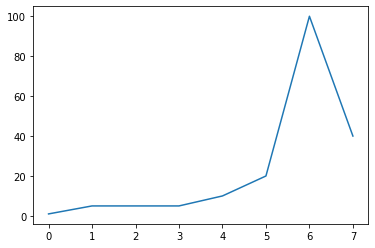

In [126]:
# Matplotlib is choosing the plot for us here, and it might tell the story we want.

nums_series = pd.Series([1, 5, 5, 5, 10, 20, 100, 40])
nums_series.plot()

plt.show()

We can also use specific types of visualizations like this:

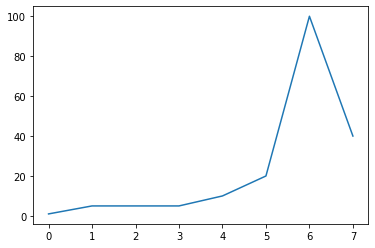

In [127]:
# So, here we specify the type of plot we would like Matplotlib to use.
nums_series.plot()

plt.show()

The `.value_counts` method returns a Series, so we can call `.plot` method on the resulting Series; this is called method chaining.

In [128]:
# Construct the Series.
lets_series = pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a'])
lets_series.value_counts()

a    4
b    2
c    1
d    1
dtype: int64

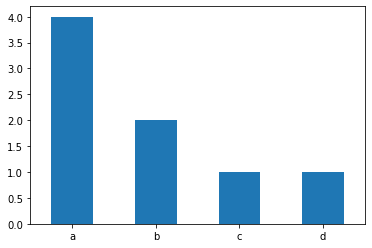

In [129]:
# Plot the value_counts of our Series. Rotate our x-tick values.
lets_series.value_counts().plot.bar(rot=0)

plt.show()

Any additional keyword arguments passed to pandas `.plot` method will be passed along to the corresponding Matplotlib functions. In addition, we can use Matplotlib the same way we have before to set titles, tweak axis labels, etc. Let's look at both ways.

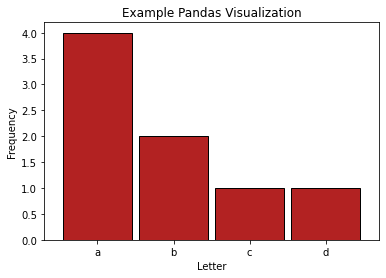

In [130]:
# Use the parameters of the .plot method to customize my chart.

pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).value_counts().plot.bar(title='Example Pandas Visualization', 
                                                                            rot=0, 
                                                                            color='firebrick', 
                                                                            ec='black',
                                                                            width=.9).set(xlabel='Letter',
                                                                                         ylabel='Frequency')

plt.show()

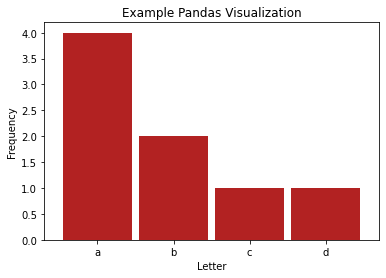

In [131]:
# Use Matplotlib to customize.

pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).value_counts().plot.bar(color='firebrick', width=.9)
plt.title('Example Pandas Visualization')
plt.xticks(rotation=0)
plt.xlabel('Letter')
plt.ylabel('Frequency')

plt.show()

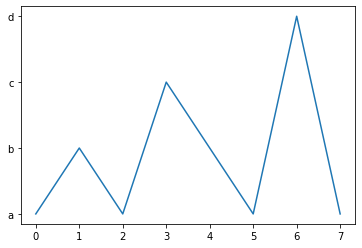

In [132]:
plt.plot(pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']))

## Further Reading

- [pandas documentation: `Series`](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#series)

___

## Exercises Part III

Use pandas to create a Series named letters from the following string:

        'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'

1. Which letter occurs the most frequently in the letters Series? 

In [4]:
letters = list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy')
letters = pd.Series(letters)
letters

0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object

In [8]:
type(letters)
letters.describe

<bound method NDFrame.describe of 0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object>

2. Which letter occurs the least frequently?
    

In [18]:
letters_val_count = letters.value_counts()
letters_val_count[letters_val_count == min(letters.value_counts())]

l    4
dtype: int64

3. How many vowels are in the Series?
    

In [23]:
sum(letters.str.count('[aeiou]'))


34

4. How many consonants are in the Series?
    

In [24]:
sum(letters.str.count('[^aeiou]'))

166

5. Create a Series that has all of the same letters but uppercased.
    

In [25]:
letters.str.upper()

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

6. Create a bar plot of the frequencies of the 6 most commonly occuring
      letters.

Text(0.5, 1.0, 'Top Six Letters')

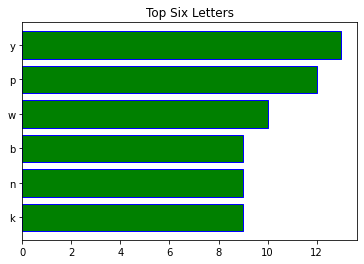

In [77]:
top_six = letters.value_counts().head(6)
top_six.plot(kind='barh', color='green', ec='blue', width=.8)
plt.gca().invert_yaxis()
plt.title('Top Six Letters')


Use pandas to create a Series named numbers from the following list:

        ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']

7. What is the data type of the numbers Series?

In [34]:
numbers = ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']
numbers = pd.Series(numbers)
type(numbers)

pandas.core.series.Series

8. How many elements are in the number Series?
    

In [35]:
numbers.size

20

9. Perform the necessary manipulations by accessing Series attributes and methods to convert the numbers Series to a numeric data type.
    

In [44]:
numbers = numbers.str.replace(',', '_').str.lstrip('$')
numbers = numbers.astype('float')


10. Run the code to discover the maximum value from the Series.

In [45]:
numbers.max()

4789988.17

11. Run the code to discover the minimum value from the Series.

In [46]:
numbers.min()

278.6

12. What is the range of the values in the Series?
    

In [78]:
numbers.max() - numbers.min()

4789709.57

13. Bin the data into 4 equally sized intervals or bins and output how many values fall into each bin.
    

In [101]:
num_vals_sorted = numbers.sort_values()
nvs_vc = num_vals_sorted.value_counts(bins=4).sort_values(ascending=False)


14. Plot the binned data in a meaningful way. Be sure to include a title and axis labels.

[Text(0.5, 0, 'Number of indices in range'), Text(0, 0.5, 'Amount ranges')]

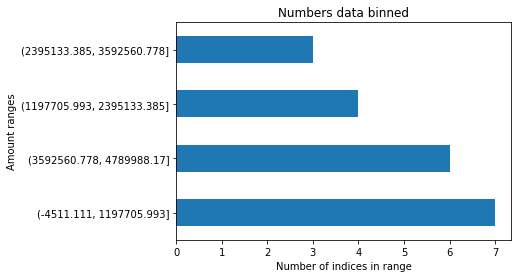

In [103]:
nvs_vc.plot.barh(title='Numbers data binned').set(xlabel='Number of indices in range', ylabel='Amount ranges')

Use pandas to create a Series named exam_scores from the following list:

        [60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]
        
15. How many elements are in the exam_scores Series?

In [84]:
exam_scores = [60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]
exam_scores = pd.Series(exam_scores)

16. Run the code to discover the minimum, the maximum, the mean, and the median scores for the exam_scores Series.
    

In [108]:
exam_scores.describe()



count    20.000000
mean     78.150000
std      11.352139
min      60.000000
25%      70.500000
50%      79.000000
75%      85.250000
max      96.000000
dtype: float64

17. Plot the Series in a meaningful way and make sure your chart has a title and axis labels.

In [114]:
min_score = exam_scores.min()
max_score = exam_scores.max()
mean_score = exam_scores.mean()
median_score = exam_scores.median()

[Text(0.5, 0, 'Scores'), Text(0, 0.5, 'Frequency')]

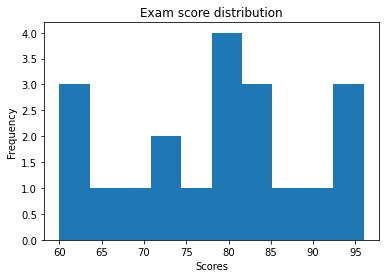

In [125]:
exam_scores.plot.hist(title='Exam score distribution').set(xlabel='Scores', ylabel='Frequency')



In [121]:
exam_curve = 100 - max_score
exam_scores + exam_curve

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64

18. Write the code necessary to implement a curve for your exam_grades Series and save this as curved_grades. Add the necessary points to the highest grade to make it 100, and add the same number of points to every other score in the Series as well.
    

In [124]:
curved_grades = exam_scores + exam_curve
type(curved_grades)

pandas.core.series.Series

19. Use a method to convert each of the numeric values in the curved_grades Series into a categorical value of letter grades. For example, 86 should be a 'B' and 95 should be an 'A'. Save this as a Series named letter_grades.

In [126]:
grade_scale = [0, 70, 77, 85, 92, 101]
grade_labels = ['F', 'D', 'C', 'B', 'A']

letter_grades = pd.cut(curved_grades, bins=grade_scale, labels=grade_labels)

letter_grades


0     F
1     B
2     C
3     F
4     A
5     D
6     F
7     B
8     A
9     C
10    F
11    D
12    D
13    C
14    A
15    C
16    B
17    A
18    B
19    C
dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

20. Plot your new categorical letter_grades Series in a meaningful way and include a title and axis labels.

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtick'

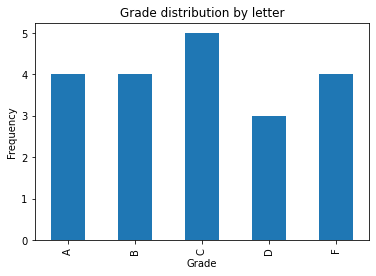

In [140]:
letter_grades.value_counts().sort_index().plot.bar(title='Grade distribution by letter').set(xlabel='Grade', ylabel='Frequency')
plt.gca().invert_xaxis()
plt.xtick(rotation=0)

## More Practice

Revisit the exercises from [https://gist.github.com/ryanorsinger/f7d7c1dd6a328730c04f3dc5c5c69f3a](https://gist.github.com/ryanorsinger/f7d7c1dd6a328730c04f3dc5c5c69f3a). 

After you complete each set of Series exercises, use any extra time you have to pursue the challenge below. You can work on these in the same notebook or file as the Series exercises or create a new practice notebook you can work in a little every day to keep your python and pandas skills sharp by trying to solve problems in multiple ways. *These are not a part of the Series exercises grade, so don't worry if it takes you days or weeks to meet the challenge.*

**Challenge yourself to be able to...**

- solve each using vanilla python.
    
- solve each using list comprehensions.
    
- solve each by using a pandas Series for the data structure instead of lists and using vectorized operations instead of loops and list comprehensions.